In [72]:
import numpy as np
from sklearn.datasets import load_iris, load_digits
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import umap
import requests
%matplotlib inline
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})

In [75]:
r = requests.get("https://api.opendota.com/api/teams")
print(r.json()[:10])
teams = pd.DataFrame(r.json())
print(teams)
teams.sort_values("team_id")
goodteams = teams[teams["wins"] > 50]
print(goodteams)
print(goodteams.shape)



[{'team_id': 2586976, 'rating': 1575.43, 'wins': 552, 'losses': 303, 'last_match_time': 1581438134, 'name': 'OG', 'tag': 'OG', 'logo_url': 'https://steamcdn-a.akamaihd.net/apps/dota2/images/team_logos/2586976.png'}, {'team_id': 726228, 'rating': 1531.19, 'wins': 1052, 'losses': 685, 'last_match_time': 1580042698, 'name': 'Vici Gaming', 'tag': 'VG', 'logo_url': 'https://steamcdn-a.akamaihd.net/apps/dota2/images/team_logos/726228.png'}, {'team_id': 1838315, 'rating': 1515.59, 'wins': 749, 'losses': 368, 'last_match_time': 1582489389, 'name': 'Team Secret', 'tag': 'Secret', 'logo_url': 'https://steamcdn-a.akamaihd.net/apps/dota2/images/team_logos/1838315.png'}, {'team_id': 39, 'rating': 1509.16, 'wins': 1061, 'losses': 635, 'last_match_time': 1581541741, 'name': 'Evil Geniuses', 'tag': 'EG', 'logo_url': 'https://steamcdn-a.akamaihd.net/apps/dota2/images/team_logos/39.png'}, {'team_id': 5228654, 'rating': 1450.04, 'wins': 79, 'losses': 36, 'last_match_time': 1535061995, 'name': 'VGJ Storm'

In [76]:
import time

ds = []
for team_id in goodteams["team_id"]:
    #name = goodteams.loc[goodteams['team_id'] == team_id]["tag"]
    #print(name)
    
    #df.loc[df.Letters=='C','Letters'].values[0]
    tag = goodteams.loc[goodteams.team_id == team_id].tag.item()
    print("Grabbing: {0}".format(tag))
    r = requests.get("https://api.opendota.com/api/teams/{0}/heroes".format(team_id)).json()
    #now we want to convert to the right format
    d = {"tag":tag}
    #d = {}
    for i in r:
        try:
            d[i['localized_name']] = i['games_played']
        except TypeError:
            print(r)
            continue
    ds.append(d)
    time.sleep(1)
    
    
#print(ds[:10])
goodteamsheroes = pd.DataFrame(ds)
goodteamsheroes.fillna(0,inplace=True)
goodteamsheroes.set_index("tag",inplace=True)
goodteamsheroes = goodteamsheroes.div(goodteamsheroes.sum(axis=1), axis=0)
print(goodteamsheroes)

C:\Users\5cent\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: `item` has been deprecated and will be removed in a future version
  if __name__ == '__main__':


Grabbing: OG
Grabbing: VG
Grabbing: Secret
Grabbing: EG
Grabbing: VGJ.Storm
Grabbing: 
Grabbing: RNG
Grabbing: Nigma
Grabbing: IG
Grabbing: PSG.LGD
Grabbing: NP
Grabbing: ThunderP
Grabbing: Fnatic
Grabbing: Alliance
Grabbing: Titan
Grabbing: GeekFam
Grabbing: Na`Vi
Grabbing: Newbee
Grabbing: Winstrike
Grabbing: Liquid
Grabbing: 
Grabbing: Mineski
Grabbing: MY
Grabbing: Aster
Grabbing: TT
Grabbing: RoX.KIS
Grabbing: SPG.int
Grabbing: VP
Grabbing: Gambit
Grabbing: VGJ.T
Grabbing: bc
Grabbing: fL
Grabbing: SAG
Grabbing: VG.J
Grabbing: EHOME
Grabbing: Orange
Grabbing: Royal
Grabbing: 
Grabbing: 
Grabbing: 
Grabbing: TSpirit
Grabbing: 4FC
Grabbing: Adroit
Grabbing: Rock.Y
Grabbing: Vega
Grabbing: aShock
Grabbing: Nyx
Grabbing: Friends
Grabbing: DTN
Grabbing: SCYTHE
Grabbing: Fntc
Grabbing: Wings
Grabbing: Arrow
Grabbing: ThePango
Grabbing: CDEC
Grabbing: OsG
Grabbing: Horde
Grabbing: 
Grabbing: SIGMA
Grabbing: Shazam
Grabbing: 
Grabbing: ZL
Grabbing: Serenity
Grabbing: AF
Grabbing: R|G
Grab

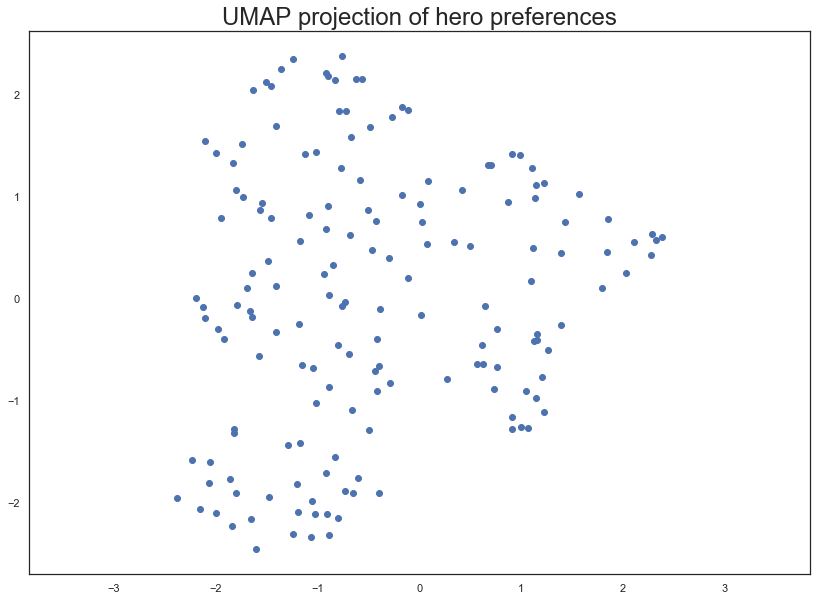

In [77]:
#divide by total number of games
goodteamsheroes["sum"] = goodteamsheroes.sum(axis=1)


reducer = umap.UMAP()
embedding = reducer.fit_transform(goodteamsheroes)
#embedding.shape
plt.scatter(embedding[:, 0], embedding[:, 1])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of hero preferences', fontsize=24);